In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize':(15, 8)})

In [3]:
cleandatafile = Path.cwd().parent.joinpath('data', 'case_data_clean.csv')

In [4]:
df = pd.read_csv(cleandatafile)

In [5]:
df

,Unnamed: 0,Date,Location,AQI,Category,Range,CAMS tag
0,0,05-08-2020,dhaka,25.0,GOOD,NaN,c
1,1,05-08-2020,gazipur,NaN,DNA,NaN,c
2,2,05-08-2020,narayanganj,22.0,GOOD,NaN,c
3,3,05-08-2020,chittagong,NaN,DNA,NaN,c
4,4,05-08-2020,sylhet,40.0,GOOD,NaN,c
...,...,...,...,...,...,...,...
20503,20552,21-07-2020,savar,NaN,DNA,NaN,c
20504,20553,21-07-2020,mymensingh,98.0,MODERATE,NaN,c
20505,20554,21-07-2020,rangpur,64.0,MODERATE,NaN,c
20506,20555,21-07-2020,cumilla,NaN,DNA,NaN,c


In [6]:
df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce')

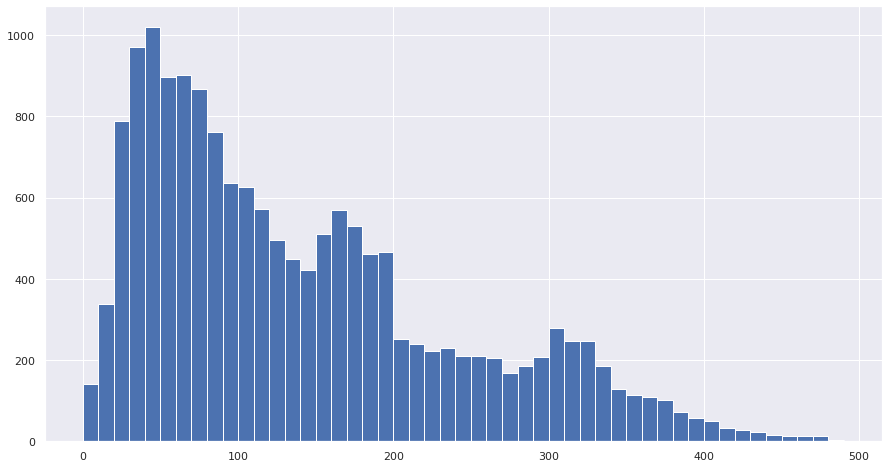

In [7]:
df['AQI'].hist(bins=range(0,500,10))

(0.0, 600.0)

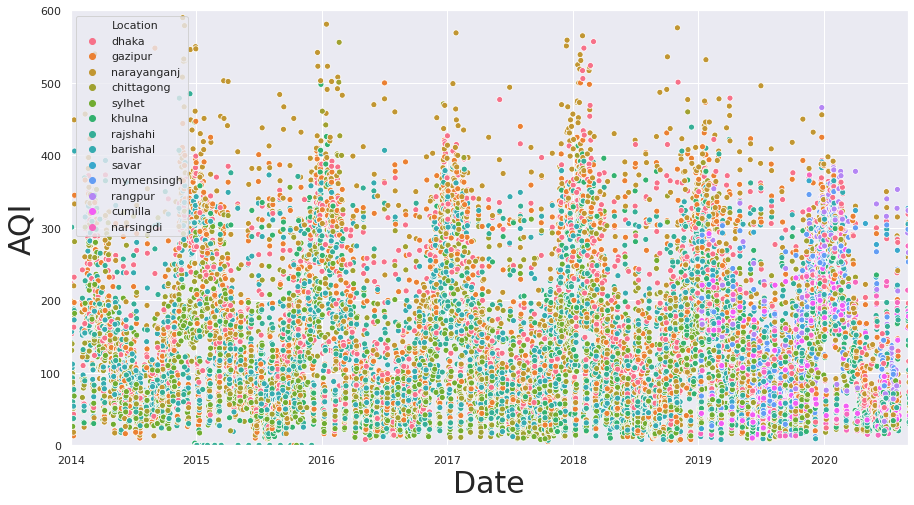

In [8]:
sns.scatterplot(data=df, x='Date', y='AQI', hue='Location')
plt.xlim(datetime.strptime('2014-01-01', "%Y-%m-%d"), datetime.strptime('2020-09-01', "%Y-%m-%d"))
plt.ylabel('AQI', fontsize=30)
plt.xlabel('Date', fontsize=30)
plt.ylim(0,600)

In [78]:
def time_resample(dataframe_orig, time_period):
    '''
    Resamples the dataframe over the given period of time. 
    For example, if values averaged over a day required then arguments would be df and "D"
    
    >> time_period: 'D' = days, 'M' = month, 'Y' = year

    Returns dataframe object
    '''
    output_df = pd.DataFrame()
    for location in df.Location.unique():
        dataframe=dataframe_orig[dataframe_orig['Location']==location]
        dataframe.index = dataframe.Date
        resampled_df = pd.DataFrame()
        resampled_df['AQImean'] = dataframe.AQI.resample(time_period).mean()
        resampled_df['AQImed'] = dataframe.AQI.resample(time_period).median()
        resampled_df['AQImin'] = dataframe.AQI.resample(time_period).min()
        resampled_df['AQImax'] = dataframe.AQI.resample(time_period).max()
        resampled_df['AQIstd'] = dataframe.AQI.resample(time_period).std()
        resampled_df['Date'] = dataframe.Date.resample(time_period).first()
        resampled_df['Location'] = dataframe.Date.resample(time_period).apply(lambda x: location)
        resampled_df['Measurements'] = dataframe.AQI.resample(time_period).count()
        resampled_df = resampled_df[resampled_df['Measurements']>resampled_df['Measurements'].max()/4]
        output_df = pd.concat([output_df, resampled_df])
    #  To ensure statistical significance want to omit values when a significant fraction of the
    #  expected number of measurements in the given time period are missing. 
    #  For example, days when only 5 hours in 24 have measurement data available.
    return output_df

In [84]:
def time_resample(dataframe, time_period):
    '''
    Resamples the dataframe over the given period of time. 
    For example, if values averaged over a day required then arguments would be df and "D"
    
    >> time_period: 'D' = days, 'M' = month, 'Y' = year

    Returns dataframe object
    '''
    dataframe.index = dataframe.Date
    dataframe = dataframe.groupby(by='Location')
    resampled_df = pd.DataFrame()
    resampled_df['AQImean'] = dataframe.AQI.resample(time_period).mean()
    resampled_df['AQImed'] = dataframe.AQI.resample(time_period).median()
    resampled_df['AQImin'] = dataframe.AQI.resample(time_period).min()
    resampled_df['AQImax'] = dataframe.AQI.resample(time_period).max()
    resampled_df['AQIstd'] = dataframe.AQI.resample(time_period).std()
    resampled_df['Date'] = dataframe.Date.resample(time_period).first()
    #resampled_df['Location'] = dataframe.Date.resample(time_period).apply(lambda x: location)
    resampled_df['Measurements'] = dataframe.AQI.resample(time_period).count()
    resampled_df = resampled_df[resampled_df['Measurements']>resampled_df['Measurements'].max()/4]
    #output_df = pd.concat([output_df, resampled_df])
    #  To ensure statistical significance want to omit values when a significant fraction of the
    #  expected number of measurements in the given time period are missing. 
    #  For example, days when only 5 hours in 24 have measurement data available.
    return resampled_df

In [85]:
df_weekavg = time_resample(df, 'W')
df_monthavg = time_resample(df, 'M')

In [87]:
df_weekavg

AQImean  AQImed  AQImin  AQImax      AQIstd  \
Location Date                                                         
barishal 2014-01-05  141.666667   157.0   107.0   161.0   30.088758   
         2014-01-12  167.666667   142.5    54.0   406.0  128.238320   
         2014-02-09  109.600000    97.0    54.0   161.0   45.676033   
         2014-02-16  208.000000   155.0   154.0   315.0   92.666067   
         2014-02-23  251.428571   268.0   118.0   330.0   78.296141   
...                         ...     ...     ...     ...         ...   
sylhet   2019-12-15  113.500000   117.0    56.0   155.0   36.593715   
         2019-12-22  174.000000   170.0   158.0   195.0   15.899686   
         2019-12-29  167.857143   165.0   144.0   206.0   19.437323   
         2020-01-05  132.000000   124.0    97.0   175.0   39.610605   
         2020-08-02   66.800000    74.0    23.0    89.0   25.420464   

                          Date  Measurements  
Location Date                                 
barishal 2014-01-05 2014-01-03             3  
         2014-01-12 2014-01-06             6  
         2014-02-09 2014-02-03             5  
         2014-02-16 2014-02-10             3  
         2014-02-23 2014-02-17             7  
...                        ...           ...  
sylhet   2019-12-15 2019-12-10             6  
         2019-12-22 2019-12-16             6  
         2019-12-29 2019-12-23             7  
         2020-01-05 2019-12-30             3  
         2020-08-02 2020-07-27             5  

[2588 rows x 7 columns]

In [99]:
df_monthavg.Date

Location  Date      
barishal  2014-01-31   2014-01-03
          2014-02-28   2014-02-03
          2014-03-31   2014-03-03
          2014-04-30   2014-04-03
          2014-05-31   2014-05-03
                          ...    
sylhet    2019-08-31   2019-08-01
          2019-09-30   2019-09-01
          2019-10-31   2019-10-01
          2019-11-30   2019-11-01
          2019-12-31   2019-12-01
Name: Date, Length: 614, dtype: datetime64[ns]

(0.0, 400.0)

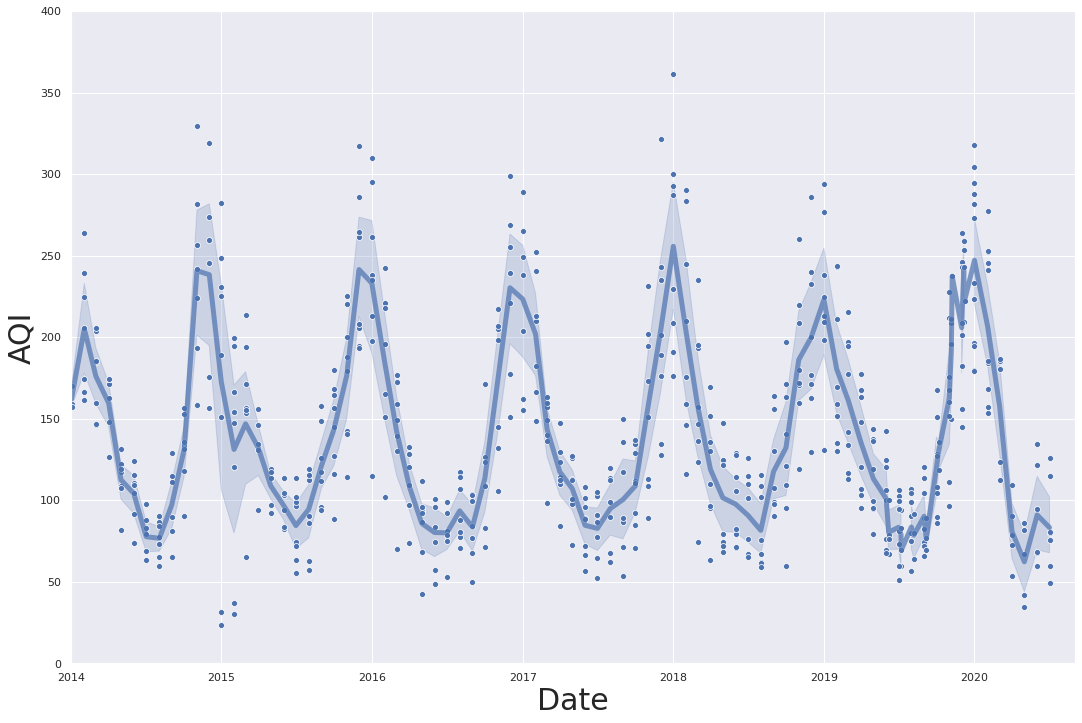

In [97]:
fig = plt.figure(figsize=(18,12))
sns.lineplot(data=df_monthavg, x='Date', y='AQImean', palette='deep', lw=5, alpha=0.7)
sns.scatterplot(data=df_monthavg, x='Date', y='AQImean', palette='deep', legend=False)
plt.xlim(datetime.strptime('2014-01-01', "%Y-%m-%d"), datetime.strptime('2020-09-01', "%Y-%m-%d"))
plt.ylabel('AQI', fontsize=30)
plt.xlabel('Date', fontsize=30)
plt.ylim(0,400)

(0.0, 400.0)

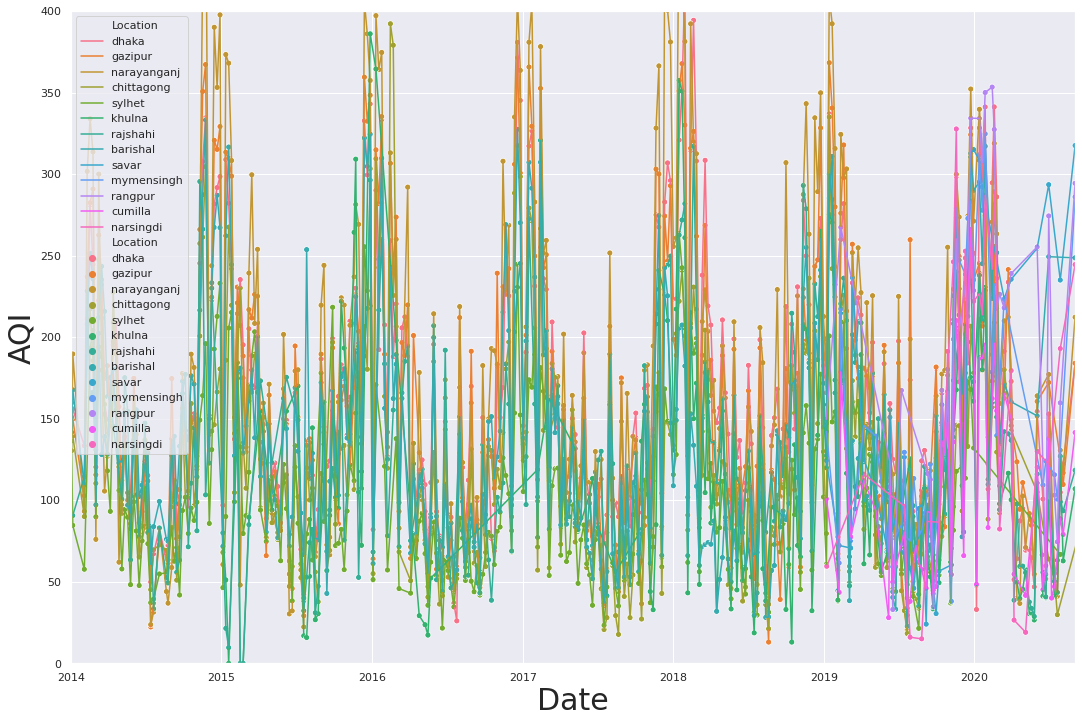

In [49]:
fig = plt.figure(figsize=(18,12))
sns.lineplot(data=df_weekavg, x='Date', y='AQImean', hue='Location')
sns.scatterplot(data=df_weekavg, x='Date', y='AQImean', hue='Location')
plt.xlim(datetime.strptime('2014-01-01', "%Y-%m-%d"), datetime.strptime('2020-09-01', "%Y-%m-%d"))
plt.ylabel('AQI', fontsize=30)
plt.xlabel('Date', fontsize=30)
plt.ylim(0,400)